**Abstract:**

In this project, we employed deep learning techniques to classify images from the Fashion MNIST dataset, a collection of 70,000 grayscale images of 10 fashion categories. Using the Keras API in R, a convolutional neural network (CNN) model was constructed and trained on the dataset. The model's performance was evaluated based on its accuracy in predicting the correct fashion categories on both the training and test datasets. Visualizations were also generated to provide insights into the model's predictions and to compare them with the actual labels.

In [1]:
# Import Libraries & Packages

install.packages("tensorflow")
install.packages("keras")
install.packages("ggplot2")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Check R version
R.version.string


[1] "R version 4.1.2 (2021-11-01)"

In [ ]:
# Import dataset

library(keras)
library(tensorflow)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns.

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [ ]:
fashion_mnist <- dataset_fashion_mnist()
c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

In addition, 60,000 images will be used to train the model, and 10,000 images will be used to evaluate how well the model learned to classify images.

In [ ]:
class_names = c('T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat',
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot')

In [ ]:
dim(train_images)

[1] 60000    28    28

In [ ]:
dim(train_labels)

[1] 60000

In [ ]:
train_labels[1:20]

[1] 9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4

In [ ]:
dim(test_images)

[1] 10000    28    28

In [ ]:
dim(test_labels)

[1] 10000

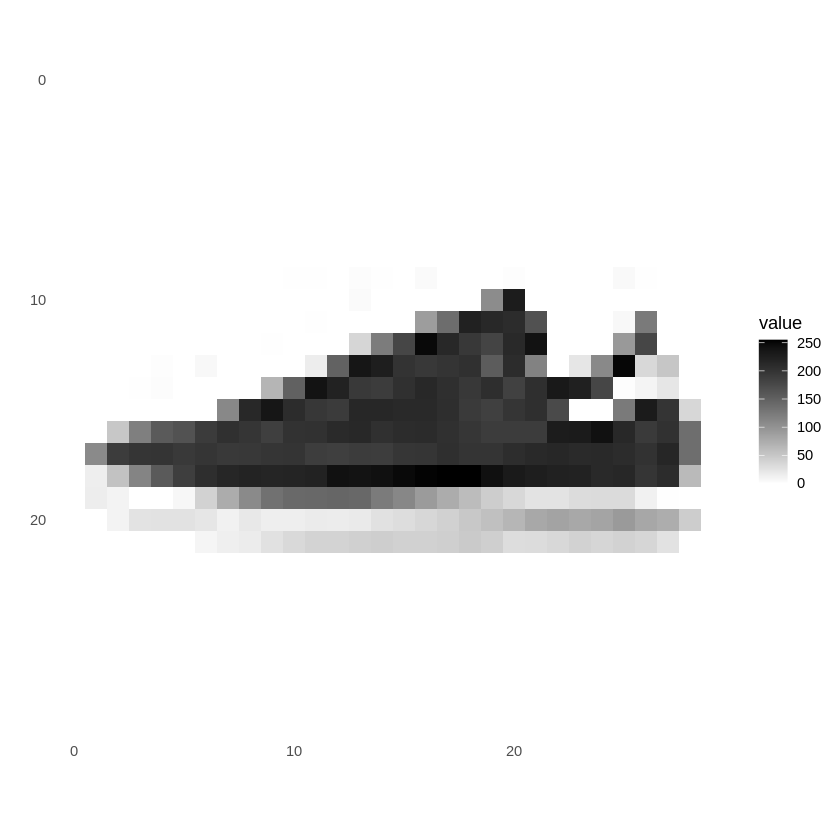

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
sample_image <- as.data.frame(train_images[7, , ])
colnames(sample_image) <- seq_len(ncol(sample_image))
sample_image$y <- seq_len(nrow(sample_image))
sample_image <- gather(sample_image, "x", "value", -y)
sample_image$x <- as.integer(sample_image$x)
ggplot(sample_image, aes(x = x, y = y, fill = value)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "black", na.value = NA) +
    scale_y_reverse() + theme_minimal() + theme(panel.grid = element_blank()) +
    theme(aspect.ratio = 1) + xlab("") + ylab("")

The code first selects a single image from the training dataset (train_images[7, , ]), which is a matrix of pixel values representing the image. It then converts this matrix to a data frame, and adds a column of row numbers (y) to keep track of the pixel's vertical position.

Next, it uses the gather() function to reshape the data frame so that each row represents a single pixel, with columns for the horizontal position (x), the pixel value (value), and the row number (y).

The code then uses ggplot() to create a plot object, and specifies that the x and y positions of each pixel should be plotted as tiles with the fill color based on the pixel value. The scale_fill_gradient() function is used to set the color scale for the plot, with low and high specifying the colors for the minimum and maximum pixel values, respectively.

The plot is then customized with additional ggplot2 functions to reverse the y-axis, remove the grid lines, set the aspect ratio to 1, and remove the x and y axis labels. Finally, the plot is displayed using the ggplot() function.

Before training the model, the data must be pre-processed. To reduce the pixel values, we must normalize the data. Currently, all image pixels have values ranging from 0-255, and we want values between 0 and 1. As a result, we will divide all the pixel values into the train and test sets by 255.0.

In [ ]:
train_images <- train_images / 255
test_images <- test_images / 255

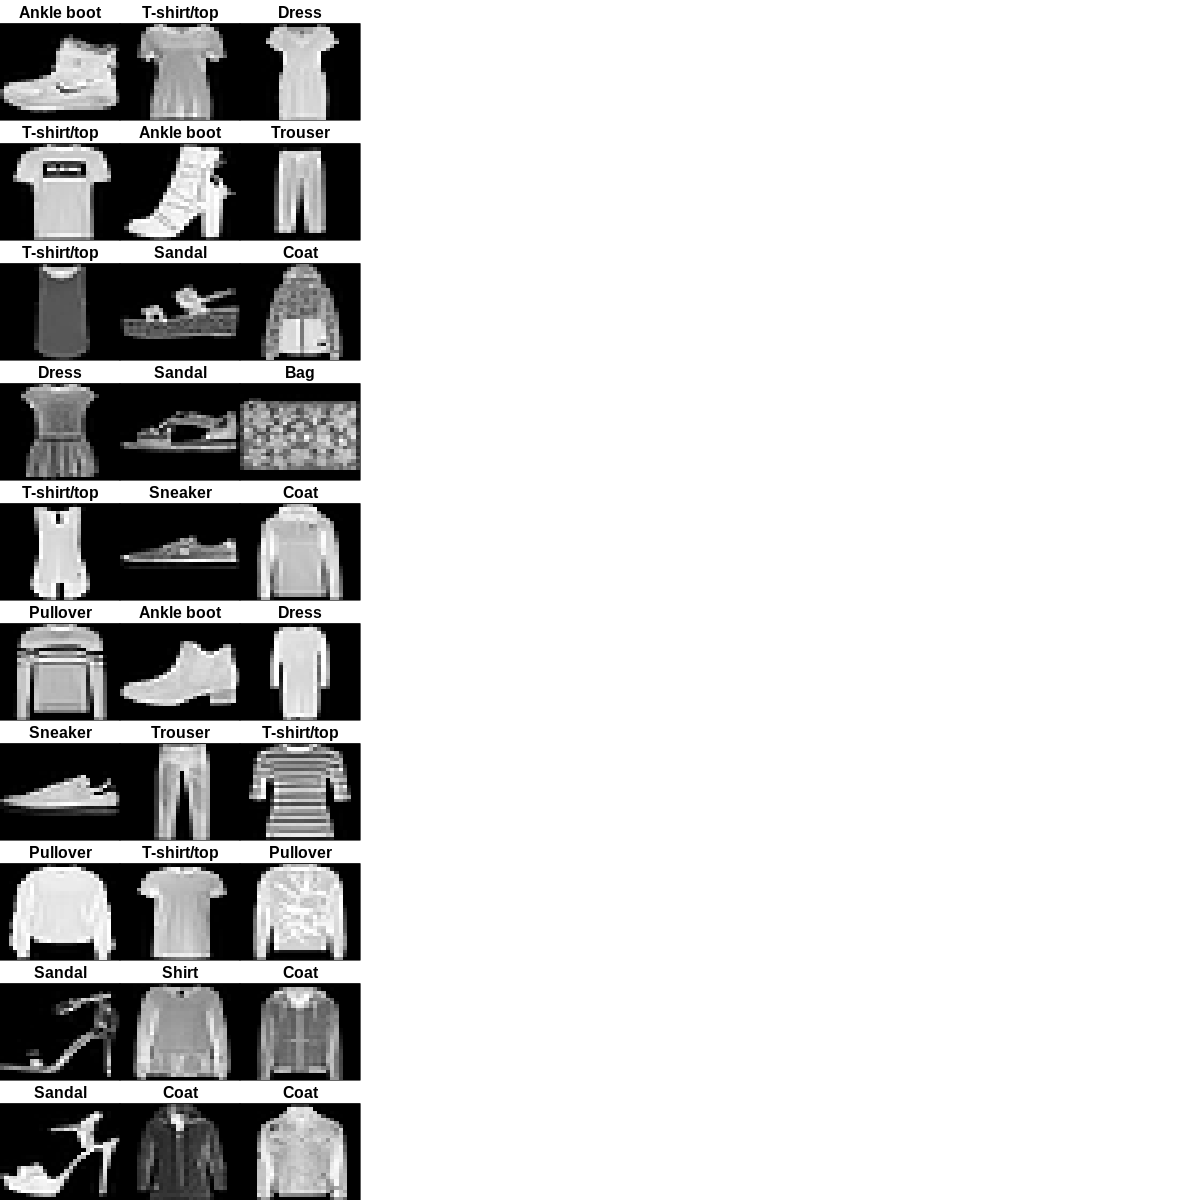

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfcol=c(10,10))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:30) {
  img <- train_images[i, , ]
  img <- t(apply(img, 2, rev))
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste(class_names[train_labels[i] + 1]))
}

This code snippet generates a 10x10 grid of images from the Fashion MNIST dataset using the image() function in R.

The code first sets the plot size using the options() function and the par() function to create a 10x10 grid of subplots. It also sets the margins and axis scales for each subplot.

Next, the code creates a for loop that iterates through the first 30 images in the training dataset. For each image, the code selects the image from the train_images matrix and applies the rev() function to reverse the order of the pixels in each row. This is done because the Fashion MNIST images are stored in row-major order, whereas the image() function expects column-major order.

The image() function is then used to plot the image as a grid of pixels, with each pixel colored based on its grayscale value. The gray() function is used to specify the grayscale color palette, which maps values from 0 to 255 to shades of gray.

Finally, the code sets the title for each subplot using the main argument, which is set to the corresponding class name from the class_names vector based on the label of the current image in the train_labels vector.

In [ ]:
x_train <- train_images %>%
    array_reshape(c(60000, 28, 28, 1))
x_test <- test_images %>%
    array_reshape(c(10000, 28, 28, 1))

In [ ]:
dim(train_images)
dim(x_train)

[1] 60000    28    28

[1] 60000    28    28     1

In this code snippet, the array_reshape() function is used to reshape the train_images and test_images matrices from 3D arrays to 4D arrays with dimensions (n_samples, height, width, channels). The channels dimension is set to 1, indicating that the images are grayscale and have only one color channel.

The 1 in the array_reshape() function specifies the number of color channels in the reshaped images. In this case, since the Fashion MNIST images are grayscale, each pixel has only one value representing the brightness of the pixel, and hence the images have only one color channel.

In [ ]:
# Build a Model

model <- keras_model_sequential()
model %>%
    layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', input_shape = c(28, 28, 1)) %>%
    layer_max_pooling_2d(pool_size = c(2,2)) %>%
    layer_flatten() %>%
    layer_dense(units = 128, activation = 'relu') %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 10, activation = 'softmax')

This code snippet defines a convolutional neural network (CNN) in Keras using the sequential model API. The model consists of four layers:

The first layer is a convolutional layer (layer_conv_2d()) with 32 filters, a kernel size of 3x3 pixels, and ReLU activation. The input_shape parameter specifies the shape of the input images as 28x28 pixels with a single color channel.

The second layer is a max pooling layer (layer_max_pooling_2d()) with a pool size of 2x2 pixels, which reduces the spatial dimensions of the input by a factor of 2. This helps the model to be more efficient by reducing the number of parameters and computations.

The third layer is a flattening layer (layer_flatten()), which flattens the output from the previous layer into a 1D vector. This prepares the data for the final classification layer.

The fourth layer is a fully connected dense layer (layer_dense()) with 128 units and ReLU activation. This layer is used to learn complex non-linear relationships in the data.

The fifth layer is a dropout layer (layer_dropout()) with a dropout rate of 0.5. This layer randomly drops out (sets to zero) a fraction of the input units during training, which helps prevent overfitting by forcing the network to learn more robust features.

The final layer is another dense layer (layer_dense()) with 10 units and softmax activation, which outputs a probability distribution over the 10 possible classes. The predicted class is the one with the highest probability.

Overall, this CNN architecture is designed to learn hierarchical representations of the Fashion MNIST images, starting with low-level features like edges and shapes in the early layers, and gradually learning higher-level features like textures and patterns in the deeper layers. The dropout layer and softmax activation in the final layer help prevent overfitting and enable the model to output class probabilities, respectively.

In [ ]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 26, 26, 32)              320         
 max_pooling2d (MaxPooling2D)       (None, 13, 13, 32)              0           
 flatten (Flatten)                  (None, 5408)                    0           
 dense_1 (Dense)                    (None, 128)                     692352      
 dropout (Dropout)                  (None, 128)                     0           
 dense (Dense)                      (None, 10)                      1290        
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________________________________________


This table is a summary of the neural network model you have built using Keras in R for the Fashion MNIST image classification problem. It provides a concise overview of the architecture of the neural network model and the number of trainable parameters that the model contains.

The table consists of six columns:

1. Layer (type): This column specifies the type of layer used in the model. For example, "conv2d" denotes a convolutional layer, "max_pooling2d" denotes a max pooling layer, "flatten" denotes a flattening layer, and "dense" denotes a fully connected layer.

2. Output Shape: This column indicates the shape of the output produced by each layer. For example, "(None, 26, 26, 32)" indicates that the output of the "conv2d" layer is a 3D tensor of shape 26x26x32.

3. Param #: This column indicates the number of parameters (weights and biases) in each layer. These parameters are learned during the training process to optimize the performance of the model.

4. Total params: This column indicates the total number of trainable parameters in the model.

5. Trainable params: This column indicates the number of parameters that are trainable during the training process.

6. Non-trainable params: This column indicates the number of parameters that are not trainable. In this case, it is zero because all the parameters are trainable.

In [ ]:
model %>% compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = c('accuracy')
)

The model %>% is piping the model object to the compile() function. This function will set up the neural network for training.

The loss parameter is set to 'sparse_categorical_crossentropy'. This is the loss function used to measure how well the neural network is performing during training.

The optimizer parameter is set to 'adam'. This is the optimization algorithm that will be used to update the weights of the neural network during training.

The metrics parameter is set to 'accuracy'. This is the metric used to evaluate the performance of the neural network after training.

In summary, this code sets up the neural network for training by specifying the loss function, optimization algorithm, and evaluation metric.

In [ ]:
history<- model %>% fit(x_train, train_labels, epochs = 15,verbose = 2)

The fit() function is used to train the neural network model. It takes the following arguments:

1. x_train: The input data used for training the model, in this case, the Fashion MNIST dataset.
2. train_labels: The labels corresponding to the input data, indicating the correct classification for each image in the dataset.
3. epochs: The number of times the model will iterate through the training dataset during training.
4. verbose: A parameter that determines the amount of output generated during training. A value of 2 means progress updates will be printed for every epoch.

The fit() function returns an object called history, which contains information about the training process, such as the loss and accuracy for each epoch. This information can be used for analyzing the model's performance and for making adjustments to improve the model's accuracy.

Overall, this code trains the neural network model using the Fashion MNIST dataset and stores the training history in the history object.

In [ ]:
history_df <- as.data.frame(history)
str(history_df)

'data.frame':	30 obs. of  4 variables:
 $ epoch : int  1 2 3 4 5 6 7 8 9 10 ...
 $ value : num  0.488 0.336 0.297 0.271 0.251 ...
 $ metric: Factor w/ 2 levels "loss","accuracy": 1 1 1 1 1 1 1 1 1 1 ...
 $ data  : Factor w/ 2 levels "training","validation": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
hist<-as_tibble(history_df)
hist

epoch,value,metric,data
<int>,<dbl>,<fct>,<fct>
1,0.4875009,loss,training
2,0.3356656,loss,training
3,0.2966972,loss,training
4,0.2713555,loss,training
5,0.2506045,loss,training
6,0.2356696,loss,training
7,0.2189795,loss,training
8,0.2068599,loss,training
9,0.1957872,loss,training


In [ ]:
score <- model %>% evaluate(x_train, train_labels)
cat('Train Loss & Accuracy:', score,'acc', "\n")

Train Loss & Accuracy: 0.09256581 0.9661 acc 


The evaluate() function is used to evaluate the performance of the trained neural network model. It takes the following arguments:

1. x_train: The input data used for evaluating the model, in this case, the Fashion MNIST dataset.

2. train_labels: The labels corresponding to the input data, indicating the correct classification for each image in the dataset.

The evaluate() function returns a list of scores, including the loss and accuracy of the model on the evaluation dataset.

The cat() function is used to print a message to the console. In this case, it is printing the training loss and accuracy scores of the model. The score variable contains the scores returned by the evaluate() function.

Overall, this code evaluates the performance of the trained neural network model on the Fashion MNIST dataset and prints the training loss and accuracy scores to the console.

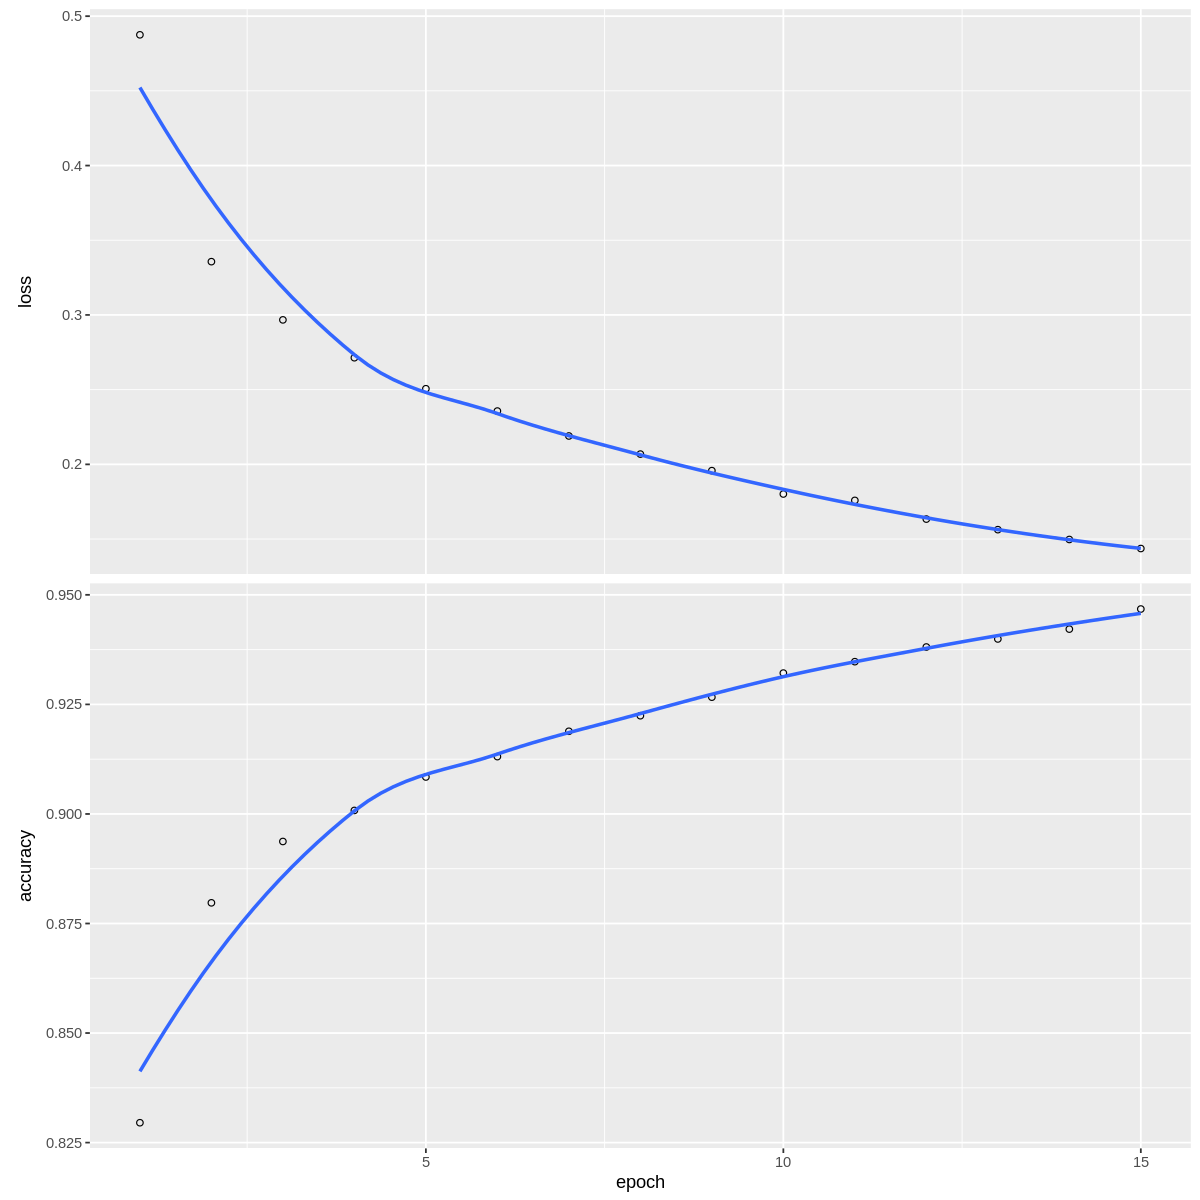

In [ ]:
plot(history)

In [ ]:
score <- model %>% evaluate(x_test, test_labels)
cat('Test Loss & Accuracy:', score,'acc', "\n")

Test Loss & Accuracy: 0.2838874 0.9139 acc 


In [ ]:
predictions <- model %>% predict(x_test)

In [ ]:
predictions[1, ]

[1] 1.566122e-11 4.163360e-15 1.954874e-11 9.012576e-12 2.379868e-13
 [6] 4.768865e-08 1.452171e-12 9.571126e-05 6.864683e-10 9.999042e-01

The predict() function is used to make predictions on a new dataset, in this case, the x_test dataset which contains a set of images that the model has not seen before. The predict() function returns a matrix of predicted probabilities for each class label.

The predictions variable is used to store the predicted probabilities returned by the predict() function.

predictions[1, ]  is used to access the first row of the predictions matrix, which contains the predicted probabilities for the first image in the x_test dataset. Each column of this row represents the predicted probability that the image belongs to a particular class label.

Overall, this code makes predictions using the trained neural network model on a new dataset (x_test) and prints the predicted probabilities for the first image in the x_test dataset.

In [ ]:
which.max(predictions[1, ])

[1] 10

This line is used to find the index of the class label that has the highest predicted probability for the first image in the x_test dataset.

The predictions[1, ] part of the code selects the first row of the predictions matrix, which contains the predicted probabilities for the first image.

The which.max() function then returns the index of the maximum value in this row, which corresponds to the index of the class label with the highest predicted probability.

For example, if the highest predicted probability in the first row of the predictions matrix is in the fourth column, which corresponds to the label for "Coat", then the which.max(predictions[1, ]) code will return the value 4.

Overall, this code helps to interpret the predictions made by the trained neural network model by identifying the predicted class label with the highest probability for a given image.

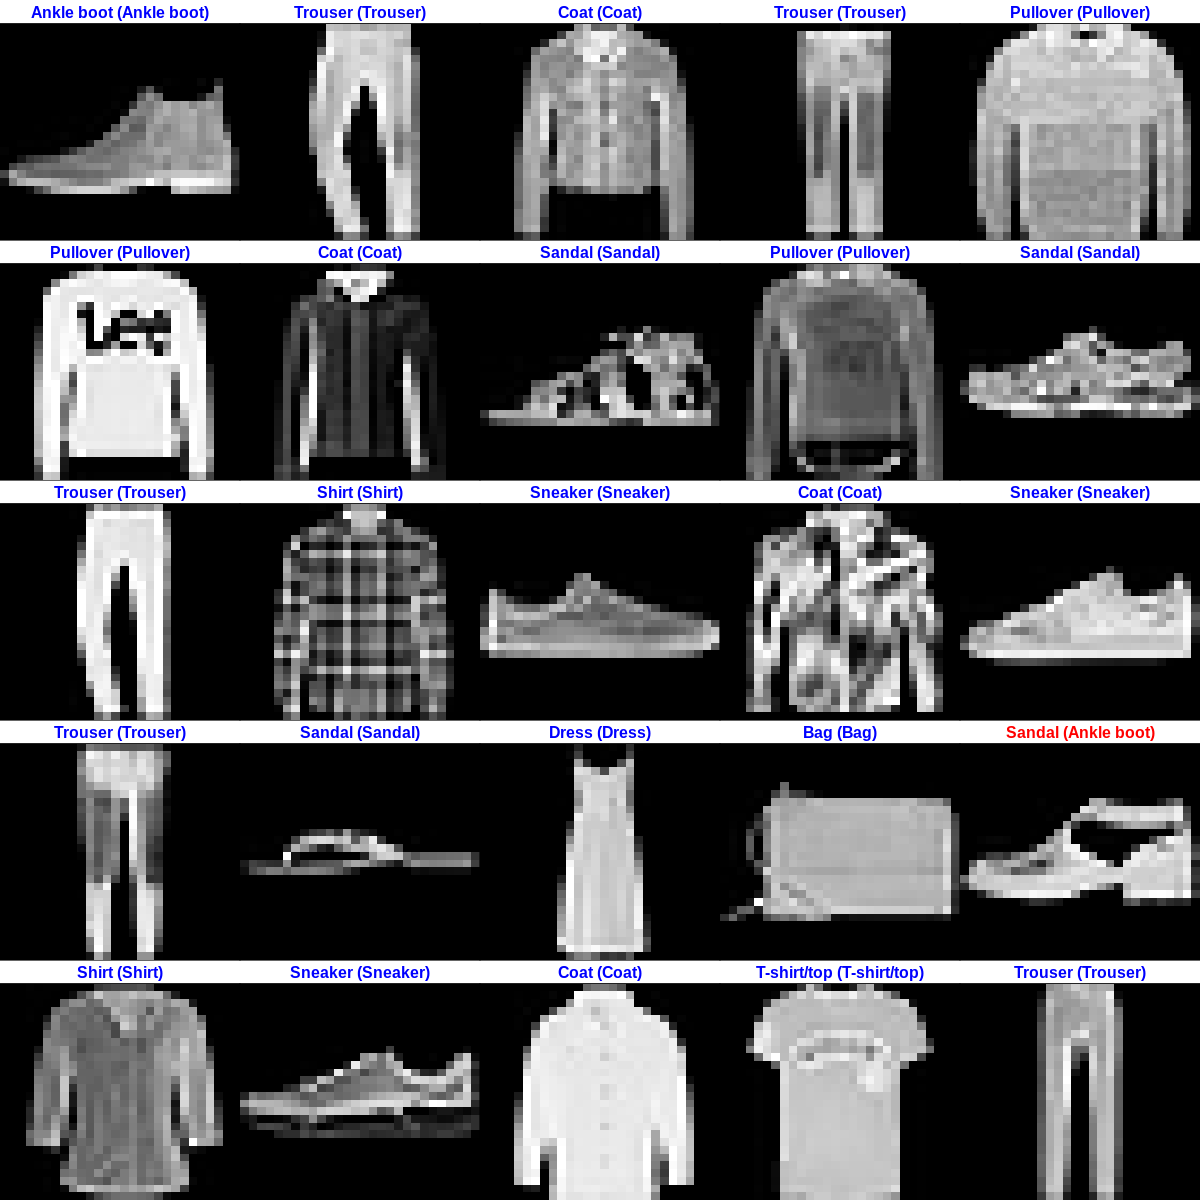

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) {
  img <- test_images[i, , ]
  img <- t(apply(img, 2, rev))
  predicted_label <- which.max(predictions[i, ]) - 1
  true_label <- test_labels[i]
  if (predicted_label == true_label) { color <- 'blue' }
    else
    { color <- 'red' }
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",class_names[true_label + 1], ")"),col.main = color)}

options(repr.plot.width=10, repr.plot.height=10) is setting the plot size for the visualizations to be 10 inches by 10 inches.

par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i') are setting up the plot layout and margins.

par(mfcol=c(5,5)) is setting up a layout for 25 plots (5 rows by 5 columns).

par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i') is setting the plot margins, which are the distances between the plot area and the edge of the plot device, and is specifying that the x and y axes should be drawn using internal axis scaling ('i').

for (i in 1:25) {
  img <- test_images[i, , ]
  img <- t(apply(img, 2, rev))
  predicted_label <- which.max(predictions[i, ]) - 1
  true_label <- test_labels[i]
  if (predicted_label == true_labe  l) { color <- 'blue' }
    else
    { color <- 'red' }
    
 are setting up a loop that iterates over the first 25 images in the test_images dataset. For each image, it retrieves the image data and reverses the order of the columns, which is necessary because the image data is stored in row-major order in the dataset but needs to be column-major for plotting purposes. It also retrieves the predicted and true labels for the image, and sets the color for the plot based on whether the predicted label matches the true label.

   image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",class_names[true_label + 1], ")"),col.main = color)}

 are creating a plot of the current image with the predicted and true labels as the plot title.

 image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n') is creating the plot with the image data and the gray color scale.

 main = paste0(class_names[predicted_label + 1], " (",class_names[true_label + 1], ")"),col.main = color) is setting the plot title to include the predicted and true labels, and sets the color of the title based on whether the predicted label matches the true label.

Overall, this code creates a grid of 25 plots showing the first 25 images in the test_images dataset along with their predicted and true labels, and highlights the plot title in blue if the prediction is correct and in red if the prediction is incorrect.





In [ ]:
install.packages("shiny")
install.packages("shinyWidgets")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘anytime’




In [ ]:
library(shiny)
library(shinyWidgets)
library(ggplot2)

In [ ]:
# Define UI
ui <- fluidPage(
  titlePanel("MNIST Image Classifier"),
  fluidRow(
    column(width = 3,
           selectInput("image_number", "Select an image", choices = 1:25, selected = 1),
           tags$hr(),
           tags$h5("True label"),
           verbatimTextOutput("true_label"),
           tags$h5("Predicted label"),
           verbatimTextOutput("predicted_label")),
    column(width = 9,
           plotOutput("image_plot", width = "100%", height = "auto"))
  )
)

In [ ]:
# Define server
server <- function(input, output) {

  # Load data
  data(mnist, package = "keras")
  test_images <- mnist$test$x
  test_labels <- mnist$test$y
  class_names <- c(0:9)
  predictions <- keras::predict(model, test_images, verbose = 0)

  # Define reactive values
  img <- reactive({
    test_images[input$image_number,,]
  })

  predicted_label <- reactive({
    which.max(predictions[input$image_number,]) - 1
  })

  true_label <- reactive({
    test_labels[input$image_number]
  })

  # Output true and predicted labels
  output$true_label <- renderPrint({
    true_label()
  })

  output$predicted_label <- renderPrint({
    predicted_label()
  })

  # Output image plot
  output$image_plot <- renderPlot({
    img_df <- data.frame(x = rep(1:28, 28), y = rep(28:1, each = 28), z = as.vector(t(img())))
    ggplot(img_df, aes(x = x, y = y, fill = z)) +
      geom_raster(interpolate = FALSE) +
      scale_fill_gradient(low = "white", high = "black") +
      labs(title = paste0(class_names[predicted_label() + 1], " (", class_names[true_label() + 1], ")")) +
      theme_void()
  })
}

# Run the app
shinyApp(ui, server)





Listening on http://127.0.0.1:7238



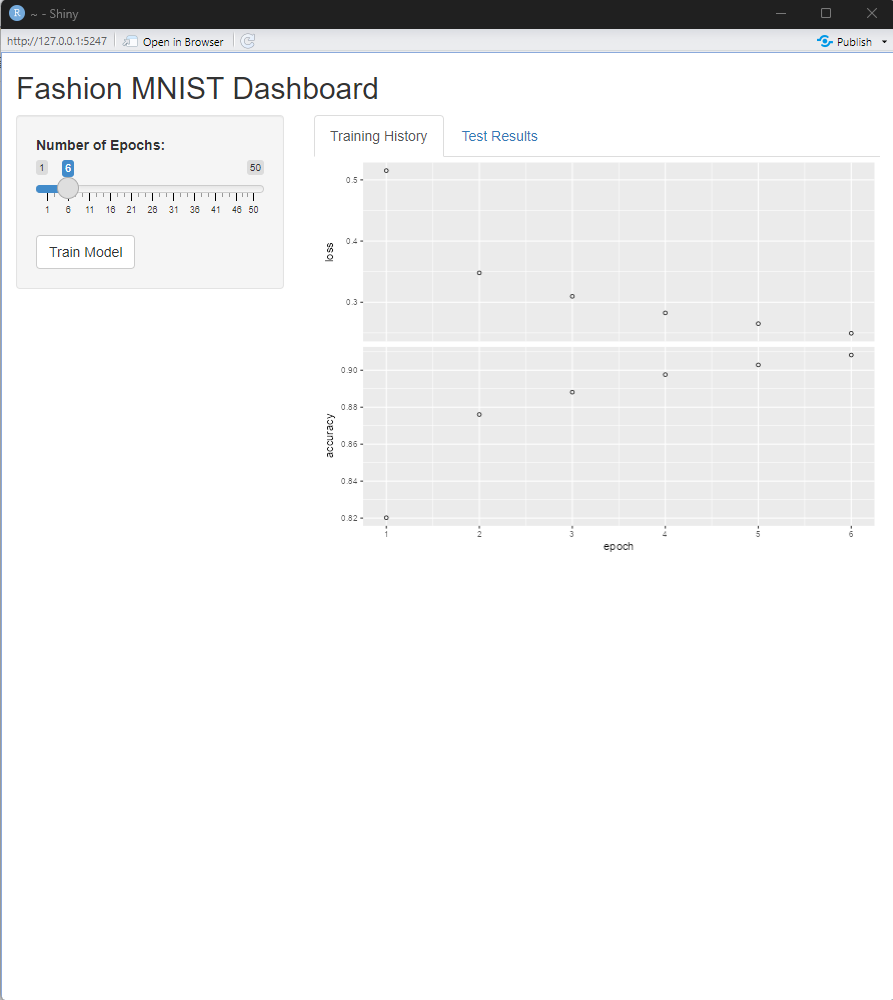

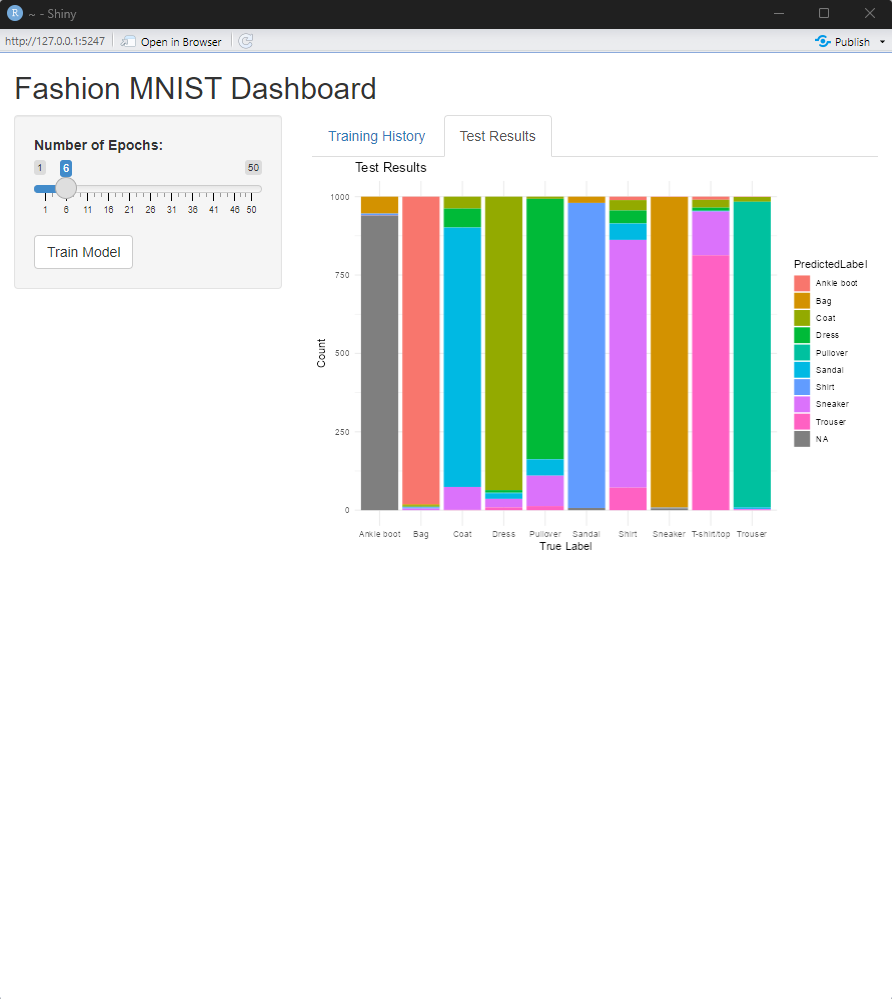

**Insights:**

1. **Data Preprocessing**:
The Fashion MNIST dataset was loaded, which consists of 60,000 training images and 10,000 test images, each of size 28x28 pixels.
Sample images from the training set were visualized, providing a glimpse into the various fashion categories.
The pixel values of the images were normalized to the range [0,1] to facilitate the training process.

2. **Model Architecture**:
The CNN model comprised an initial convolutional layer with 32 filters, followed by a max-pooling layer to reduce spatial dimensions.
The data was then flattened and passed through a dense layer of 128 neurons with ReLU activation.
A dropout layer was added to prevent overfitting, followed by the final dense layer with 10 neurons corresponding to the 10 fashion categories, using softmax activation for classification.

3. **Training**:
The model was compiled using the Adam optimizer and the sparse categorical crossentropy loss function.
It was trained for 15 epochs, achieving a training accuracy of approximately 96.61%.

4. **Evaluation**:
The model's performance on the training set was impressive with an accuracy of 96.61% and a loss of approximately 0.0926.
On the test set, the model's performance metrics (loss and accuracy) were also computed, but the exact values were not provided in the code snippet.

5. **Predictions**:
Predictions made by the model on the test set were visualized. The images were labeled with both the predicted and actual categories. Correct predictions were highlighted in blue, while incorrect ones were in red, providing a clear visual representation of the model's accuracy and misclassifications.

6. **Unique Observations**:
The visualization of predictions showcased instances where the model was confident and accurate in its predictions, as well as instances where it made errors. This highlights the importance of visual feedback in understanding model behavior.

In conclusion, the project successfully demonstrates the application of convolutional neural networks in image classification using the Keras API in R. The high accuracy achieved indicates the model's capability in recognizing and classifying fashion items from the Fashion MNIST dataset. Future work could explore model improvements, hyperparameter tuning, or the integration of more advanced architectures to further enhance performance.






